METHOD _ I

In [31]:
!pip install pandas

In [32]:
!pip install scikit-learn


In [33]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [34]:
import random
import time
import pandas as pd
from sklearn.preprocessing import StandardScaler
import math

In [35]:
try:
  df = pd.read_csv('/content/housing.csv')
except FileNotFoundError:
  print('Error: not found')
  exit()
df.dropna(inplace=True)

In [48]:
target_column = 'median_house_value'
column_excluded = 'ocean_proximity' # This is now the column to encode in one-hot encoding


y = df[target_column]
X = df.drop(columns=[target_column])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = [column_excluded]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numerical_features) + list(cat_feature_names)
X_train_processed = pd.DataFrame(X_train_processed, columns=all_feature_names)
X_val_processed = pd.DataFrame(X_val_processed, columns=all_feature_names)
x = X_train_processed
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()
y_true = y_train_scaled
n = len(y_true)
print("X_train mean/std:", X_train_processed.mean(), X_train_processed.std())
print("y_train scaled mean/std:", y_train_scaled.mean(), y_train_scaled.std())
learning_rate = 0.05

X_train mean/std: longitude                    -5.884386e-15
latitude                      3.671968e-16
housing_median_age            5.589150e-16
total_rooms                  -1.135693e-16
total_bedrooms               -2.429165e-17
population                   -2.113676e-17
households                    2.612889e-17
median_income                -8.811792e-17
ocean_proximity_<1H OCEAN     4.423712e-01
ocean_proximity_INLAND        3.154289e-01
ocean_proximity_ISLAND        1.835311e-04
ocean_proximity_NEAR BAY      1.126881e-01
ocean_proximity_NEAR OCEAN    1.293283e-01
dtype: float64 longitude                     1.000031
latitude                      1.000031
housing_median_age            1.000031
total_rooms                   1.000031
total_bedrooms                1.000031
population                    1.000031
households                    1.000031
median_income                 1.000031
ocean_proximity_<1H OCEAN     0.496683
ocean_proximity_INLAND        0.464701
ocean_proximity_IS

In [37]:
original_y_variance = y_train.var()

In [45]:
# y_predi = a xi + b we have to minimize error b/w this ans y_true we are going to take sqared errors because if we take average it may cancel out
a = [random.uniform(-0.1, 0.1) for _ in range(len(x.columns))]
b = random.uniform(-0.1, 0.1)

In [39]:
def sumofvariable(a,x,b,i):
  sumofvariables = 0
  for j in range(len(a)):
        sumofvariables += a[j]*x.iloc[i,j]
  return sumofvariables + b


In [40]:
import time

In [49]:
#cost function is gonna be a function of a and b J(a,b) = 1/(no of observation) (sum of squares of difference in y_True and y_pred)
iterations = 1000 #set arbitarily
n = len(y_true)
start_time_MI = time.time()
for i in range(iterations):
    total_loss = 0
    total_squared_error = 0
    #updating a,b
    for j in range(n):
      dj_dai = 0
      current_Error = sumofvariable(a,x,b,j) - y_true[j]
      #print(current_Error**2)
      dj_db = 2 * (current_Error)/n
      b = b - learning_rate * dj_db
      for k in range(len(a)):
        dj_dai = (2 * x.iloc[j,k] * (current_Error)/n )
        a[k] = a[k] - learning_rate * dj_dai
      total_squared_error += current_Error ** 2
    rmse = math.sqrt(total_squared_error / n)
    y_mean = y_true.mean()
    ss_tot = ((y_true - y_mean) ** 2).sum()
    r2 = 1 - (total_squared_error / ss_tot)
    print(f"Epoch {i}, RMSE: {rmse} R^2: {r2:.4f} MSE: {(total_squared_error / n)}")
end_time_MI = time.time()
print("a:", a)
print("b:", b)

Epoch 0, RMSE: 7.331401435340605 R^2: -52.7494 MSE: 53.74944700611428
Epoch 1, RMSE: 6.242559392373417 R^2: -37.9695 MSE: 38.969547767309564
Epoch 2, RMSE: 5.478758072558162 R^2: -29.0168 MSE: 30.01679001762123
Epoch 3, RMSE: 4.914836692901403 R^2: -23.1556 MSE: 24.15561971789
Epoch 4, RMSE: 4.477168314378552 R^2: -19.0450 MSE: 20.045036115275284
Epoch 5, RMSE: 4.123354990244024 R^2: -16.0021 MSE: 17.002056375570294
Epoch 6, RMSE: 3.828821177859447 R^2: -13.6599 MSE: 14.659871612025004
Epoch 7, RMSE: 3.578816976350751 R^2: -11.8079 MSE: 12.807930950216333
Epoch 8, RMSE: 3.363951009138907 R^2: -10.3162 MSE: 11.316166391886672
Epoch 9, RMSE: 3.1777899541089845 R^2: -9.0983 MSE: 10.098348992435982
Epoch 10, RMSE: 3.0155943874099242 R^2: -8.0938 MSE: 9.093809509378238
Epoch 11, RMSE: 2.873656917864581 R^2: -7.2579 MSE: 8.257904081590965
Epoch 12, RMSE: 2.748952583963782 R^2: -6.5567 MSE: 7.556740308881154
Epoch 13, RMSE: 2.638948857301889 R^2: -5.9641 MSE: 6.9640510714549455
Epoch 14, RMSE

Method_II Numpy

In [ ]:
!pip install numpy

In [ ]:
import numpy as np

In [ ]:
#numpy aproach simplifies this as we can just use matrix multiplication in order to do this
x_np = X_train_processed.to_numpy()
y_true_np = y_train_scaled
numoffeatures = x_np.shape[1]
a_np = np.random.rand(numoffeatures)
b_np = np.random.rand()

learning_rate = 0.05
iterations = 1000
n = len(y_true_np)
start_time_MII = time.time()
for i in range(iterations):
  y_pred_np = np.dot(x_np, a_np) + b_np
  error_np = y_pred_np - y_true_np

  dj_da = (2/n) * np.dot(x_np.T, error_np)
  dj_db = (2/n) * np.sum(error_np)
  a_np -= learning_rate * dj_da
  b_np -= learning_rate * dj_db

  total_squared_error = np.sum(error_np ** 2)
  rmse = np.sqrt(total_squared_error / n)
  y_mean = np.mean(y_true_np)
  ss_tot = np.sum((y_true_np - y_mean) ** 2)
  r2 = 1 - (total_squared_error / ss_tot)

  print(f"Epoch {i}, RMSE: {rmse}, R^2: {r2:.4f}, MSE: {(total_squared_error / n)}")
end_time_MII = time.time()
print("a (NumPy):", a_np)
print("b (NumPy):", b_np)

Method_III SKLEARN

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train_processed, y_train_scaled)

In [ ]:
a_skl = model.coef_
b_skl = model.intercept_

In [ ]:
print("a (Scikit-learn):", a_skl)
print("b (Scikit-learn):", b_skl)


In [51]:
start_time_MIII = time.time()
y_pred_train_skl = model.predict(X_train_processed)
end_time_MIII = time.time()
mse_train_skl = mean_squared_error(y_train_scaled, y_pred_train_skl)
rmse_train_skl = np.sqrt(mse_train_skl)
r2_train_skl = r2_score(y_train_scaled, y_pred_train_skl)
print(f"Training set - MSE: {mse_train_skl}, RMSE: {rmse_train_skl}, R^2: {r2_train_skl:.4f}")
y_pred_val_skl = model.predict(X_val_processed)
mse_val_skl = mean_squared_error(y_val_scaled, y_pred_val_skl)
rmse_val_skl = np.sqrt(mse_val_skl)
r2_val_skl = r2_score(y_val_scaled, y_pred_val_skl)

print(f"Validation set - MSE: {mse_val_skl}, RMSE: {rmse_val_skl}, R^2: {r2_val_skl:.4f}")

Training set - MSE: 0.3543517602353898, RMSE: 0.5952745251019816, R^2: 0.6456
Validation set - MSE: 0.36278746237466275, RMSE: 0.6023184061396951, R^2: 0.6488


In [52]:
print("Method I Time:", end_time_MI - start_time_MI)
print("Method II Time:", end_time_MII - start_time_MII)
print("Method III Time:", end_time_MIII - start_time_MIII)

Method I Time: 8980.189965724945
Method II Time: 0.3832113742828369
Method III Time: 0.0028162002563476562


In [53]:
#validation checking.
#----------------------------Method_I---------------------------#
y_pred_val_MI = []
for i in range(len(X_val_processed)):
    y_pred_val_MI.append(sumofvariable(a, X_val_processed, b, i))

mse_val_MI = mean_squared_error(y_val_scaled, y_pred_val_MI)
rmse_val_MI = np.sqrt(mse_val_MI)
r2_val_MI = r2_score(y_val_scaled, y_pred_val_MI)
print(f"Method I Validation - MSE: {mse_val_MI}, RMSE: {rmse_val_MI}, R^2: {r2_val_MI:.4f}")

#------------------------Method_II----------------------------#
y_pred_val_MII = np.dot(X_val_processed.to_numpy(), a_np) + b_np
mse_val_MII = mean_squared_error(y_val_scaled, y_pred_val_MII)
rmse_val_MII = np.sqrt(mse_val_MII)
r2_val_MII = r2_score(y_val_scaled, y_pred_val_MII)
print(f"Method II Validation - MSE: {mse_val_MII}, RMSE: {rmse_val_MII}, R^2: {r2_val_MII:.4f}")

#------------------------Method_III----------------------------#
print(f"Method III Validation - MSE: {mse_val_skl}, RMSE: {rmse_val_skl}, R^2: {r2_val_skl:.4f}")

Method I Validation - MSE: 0.38031246943001373, RMSE: 0.6166947943918561, R^2: 0.6319
Method II Validation - MSE: 0.362007263457158, RMSE: 0.6016703943665153, R^2: 0.6496
Method III Validation - MSE: 0.36278746237466275, RMSE: 0.6023184061396951, R^2: 0.6488


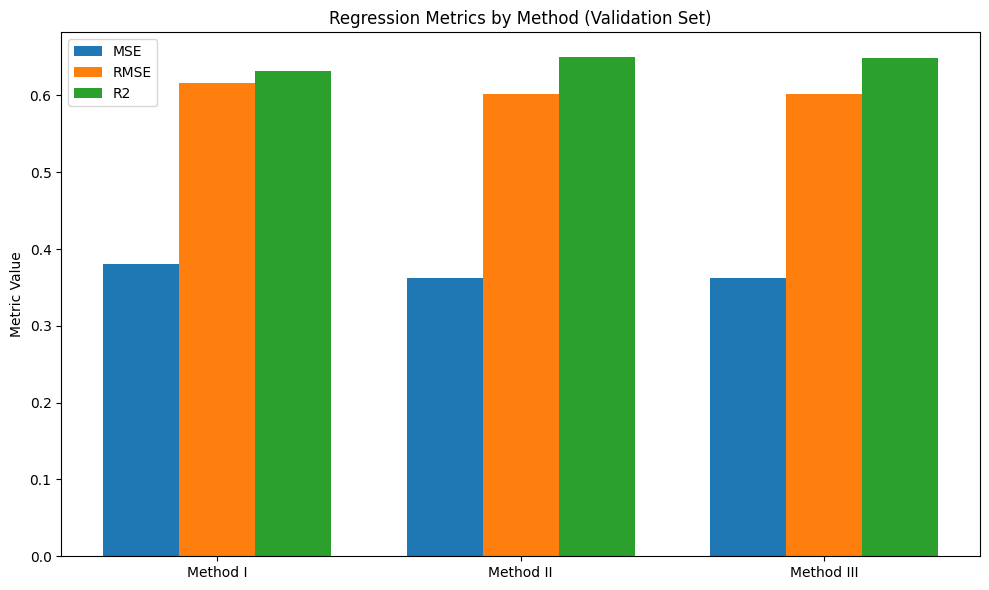

In [54]:
import matplotlib.pyplot as plt
import numpy as np


metrics = ['MSE', 'RMSE', 'R2']
method_names = ['Method I', 'Method II', 'Method III']


mse_values = [mse_val_MI, mse_val_MII, mse_val_skl]
rmse_values = [rmse_val_MI, rmse_val_MII, rmse_val_skl]
r2_values = [r2_val_MI, r2_val_MII, r2_val_skl]

x = np.arange(len(method_names))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, mse_values, width, label='MSE')
rects2 = ax.bar(x, rmse_values, width, label='RMSE')
rects3 = ax.bar(x + width, r2_values, width, label='R2')


ax.set_ylabel('Metric Value')
ax.set_title('Regression Metrics by Method (Validation Set)')
ax.set_xticks(x)
ax.set_xticklabels(method_names)
ax.legend()

fig.tight_layout()

plt.show()

COST CONVERGENCE FOR METHOD I

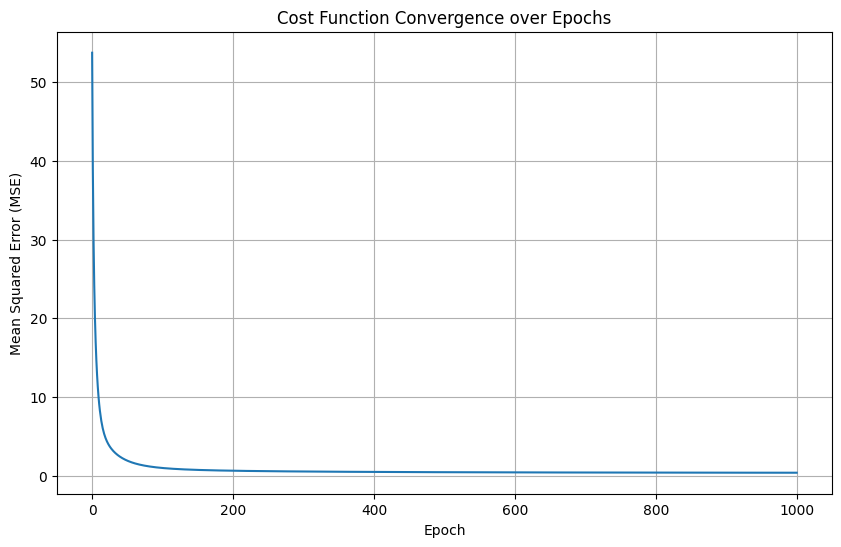

In [55]:
import re
def plot_cost_from_file(filepath):
    epochs = []
    mses = []

    try:
        with open(filepath, 'r') as f:
            for line in f:
                match = re.search(r'Epoch (\d+),.*MSE: ([\d\.]+)', line)
                if match:
                    epoch = int(match.group(1))
                    mse = float(match.group(2))
                    epochs.append(epoch)
                    mses.append(mse)

        if not epochs:
            print("No epoch data found in the file.")
            return

        plt.figure(figsize=(10, 6))
        plt.plot(epochs, mses)
        plt.xlabel('Epoch')
        plt.ylabel('Mean Squared Error (MSE)')
        plt.title('Cost Function Convergence over Epochs')
        plt.grid(True)
        plt.show()

    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
    except Exception as e:
        print(f"An error occurred: {e}")


plot_cost_from_file('/content/CSOC.txt')

COST CONVERGENCE FOR METHOD 2

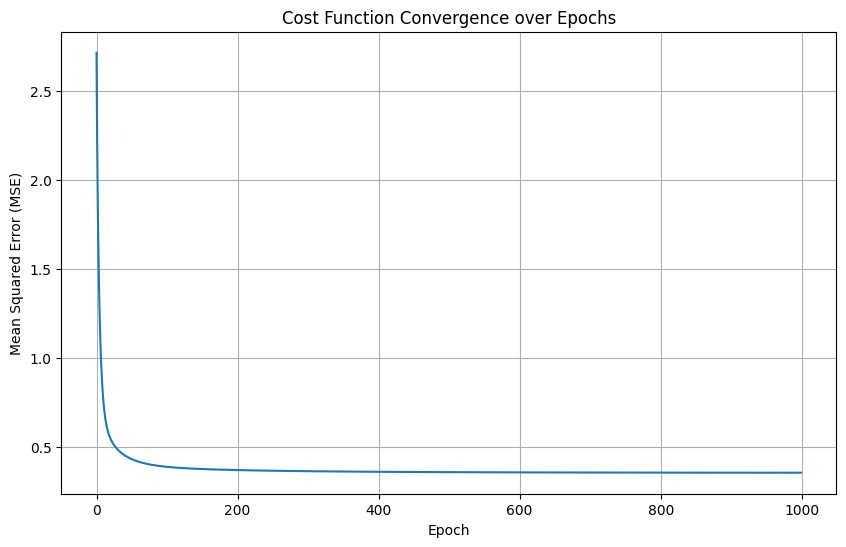

In [56]:
import re

def plot_cost_from_file(filepath):
    """
    Reads epoch data from a text file and plots the MSE convergence.

    Args:
        filepath (str): The path to the text file containing epoch data.
    """
    epochs = []
    mses = []

    try:
        with open(filepath, 'r') as f:
            for line in f:

                match = re.search(r'Epoch (\d+),.*MSE: ([\d\.]+)', line)
                if match:
                    epoch = int(match.group(1))
                    mse = float(match.group(2))
                    epochs.append(epoch)
                    mses.append(mse)

        if not epochs:
            print("No epoch data found in the file.")
            return

        plt.figure(figsize=(10, 6))
        plt.plot(epochs, mses)
        plt.xlabel('Epoch')
        plt.ylabel('Mean Squared Error (MSE)')
        plt.title('Cost Function Convergence over Epochs')
        plt.grid(True)
        plt.show()

    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
    except Exception as e:
        print(f"An error occurred: {e}")


plot_cost_from_file('/content/CSOC2.txt')